In [1]:
import pandas as pd
import os
os.getcwd()
os.chdir("D:\DATA ANA\SalesAnalysis\Sales_Data")
#os.getcwd()

# Merging all data 12 months data

In [2]:
df = pd.read_csv('D:\DATA ANA\SalesAnalysis\Sales_Data\Sales_April_2019.csv')

files = [file for file in os.listdir("D:\DATA ANA\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()



In [3]:
for file in files:
    df = pd.read_csv('D:/DATA ANA/SalesAnalysis/Sales_Data/'+ file)
    all_months_data= pd.concat([all_months_data,df])
    
#all_months_data.head()
all_months_data.to_csv("all_data.csv", index = False)   
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
#all_data

# Clean up the data

## drop row of NaN

In [6]:
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df.head()
all_data =all_data.dropna(how= 'all')

# Convert column to correct data type

### drop Or

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
2989595,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
2989596,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
2989597,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
2989598,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## augment data with additional columns 


Add Month column

# Question 1 : what was the best month of sales? how much was earned that month

In [7]:
print(all_data['Order Date'].str[0:2])

0          04
2          04
3          04
4          04
5          04
           ..
2989595    09
2989596    09
2989597    09
2989598    09
2989599    09
Name: Order Date, Length: 2975200, dtype: object


In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int16')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [9]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [10]:
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Question 1 : what was the best month of sales? how much was earned that month

In [11]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,174448.0,28988294.08,29156107.68
2,215184.0,35022155.52,35232358.72
3,272080.0,44659325.28,44913606.08
4,328928.0,53882736.32,54250723.84
5,298672.0,50162002.08,50441708.00
6,244048.0,40992409.76,41244836.16
7,257152.0,42120632.96,42364412.16
8,215168.0,35685526.72,35911486.08
9,209744.0,33359873.44,33560962.08


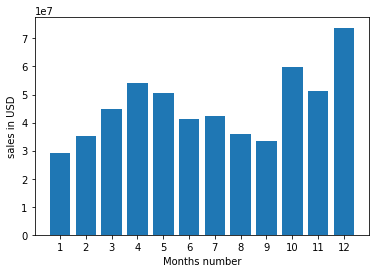

In [12]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('sales in USD')
plt.xlabel('Months number')
plt.show()

# Which city has highest no of sales

## To split column in different column out of wich only one column is to be called


In [13]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]) + all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_data["City"] = all_data["City"] .str[:-5] 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
2989595,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
2989596,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
2989597,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
2989598,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [14]:
City_sales = all_data.groupby("City").sum('Sales')
City_sales.pop("Price Each")
City_sales.pop("Month")
City_sales 

,Quantity Ordered,Sales
City,,
Atlanta GA,265632.0,4.472798e+07
Austin TX,178448.0,2.911331e+07
Boston MA,360448.0,5.858627e+07
Dallas TX,267680.0,4.428761e+07
Los Angeles CA,532624.0,8.724113e+07
New York City NY,446912.0,7.462908e+07
Portland ME,44000.0,7.196132e+06
Portland OR,180848.0,2.993172e+07
San Francisco CA,803824.0,1.321953e+08


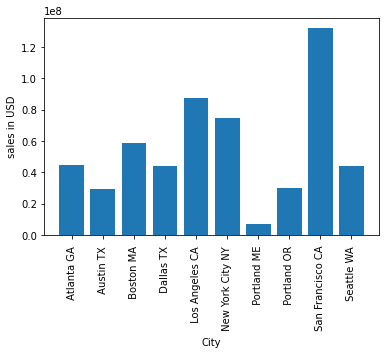

In [15]:
Cities  = [city for city, df in all_data.groupby("City")]
plt.bar(Cities, City_sales['Sales'])
plt.xticks(rotation = 90)
plt.ylabel('sales in USD')
plt.xlabel('City')
plt.show()

In [16]:
product_sale = all_data.groupby('Product').sum('Sales')
product  = [product for product, df in all_data.groupby("Product")]

In [17]:
product_most_sale = all_data.groupby('Product').count()

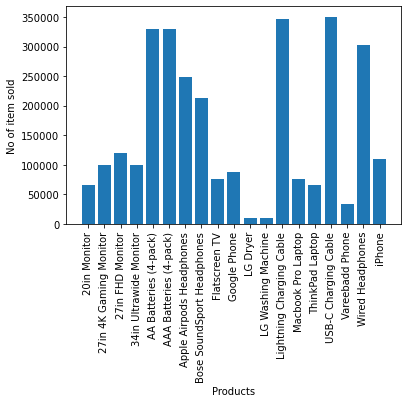

In [18]:
plt.bar(product, product_most_sale["Sales"])
plt.xticks(rotation = 90 )
plt.xlabel("Products")
plt.ylabel("No of item sold")
plt.grid
plt.show()

# Removing PRICE EACH AS IT IS THE SUM OFF ALL PRICE

In [19]:
product_sale['Price_Each'] = product_sale["Sales"]/product_sale["Quantity Ordered"]
product_sale

,Quantity Ordered,Price Each,Month,Sales,Price_Each
Product,,,,,
20in Monitor,66064.0,7.217104e+06,469376.0,7.266379e+06,109.99
27in 4K Gaming Monitor,99904.0,3.887420e+07,711040.0,3.896156e+07,389.99
27in FHD Monitor,120800.0,1.801560e+07,840928.0,1.811879e+07,149.99
34in Ultrawide Monitor,99184.0,3.757949e+07,692864.0,3.768893e+07,379.99
AA Batteries (4-pack),442160.0,1.264251e+06,2328928.0,1.697894e+06,3.84
AAA Batteries (4-pack),496272.0,9.874654e+05,2341920.0,1.483853e+06,2.99
Apple Airpods Headphones,250576.0,3.731760e+07,1751632.0,3.758640e+07,150.00
Bose SoundSport Headphones,215312.0,2.131787e+07,1505808.0,2.152905e+07,99.99
Flatscreen TV,77104.0,2.304000e+07,547584.0,2.313120e+07,300.00


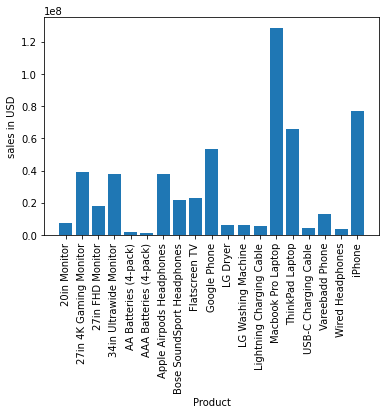

In [20]:
Product   = [product for product, df in all_data.groupby("Product")]
plt.bar(Product, product_sale['Sales'])
plt.xticks(rotation = 90)
plt.ylabel('sales in USD')
plt.xlabel('Product')
plt.show()

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [23]:
hours   = [hour for hour, df in all_data.groupby("Hour")]
count = all_data.groupby('Hour').count()
print(hours)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


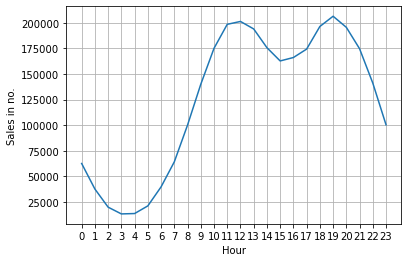

In [24]:
plt.plot(hours, count['Sales'])
plt.xticks(hours)
plt.ylabel('Sales in no.')
plt.xlabel('Hour')
plt.grid()
plt.show()